In [48]:
import numpy as np  
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import os

In [49]:
path=os.getcwd()+'/bias'
fitsfile=fits.open(path+'/'+'16-23-54_Ha_Bias_0.00s_0000.fits')
#fitsfile.info() 

datax = fitsfile[0].data

datax

array([[162, 163, 159, ..., 159, 161, 165],
       [164, 163, 162, ..., 162, 159, 162],
       [162, 162, 168, ..., 163, 161, 162],
       ...,
       [164, 161, 161, ..., 161, 163, 163],
       [161, 163, 162, ..., 162, 160, 162],
       [157, 160, 160, ..., 161, 160, 160]], dtype=uint16)

In [50]:
datax.shape

(3194, 4788)

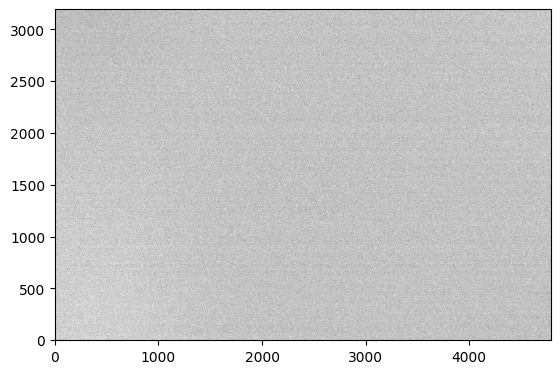

In [51]:
plt.imshow(datax, cmap='gray', vmin=155, vmax=163, origin='lower')


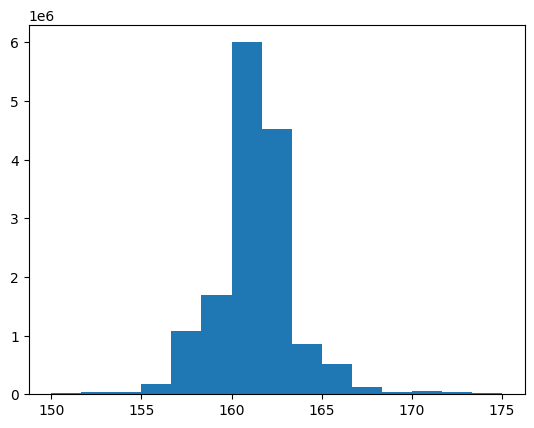

In [52]:
plt.hist(datax.flatten(),range=(150,175), bins=15);

In [53]:
def bias():
    path=os.getcwd()+'/bias'
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros(datax.shape)
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid+=dati
    Grid/=Num_of_files
    return Grid
    

## MASTERBIAS

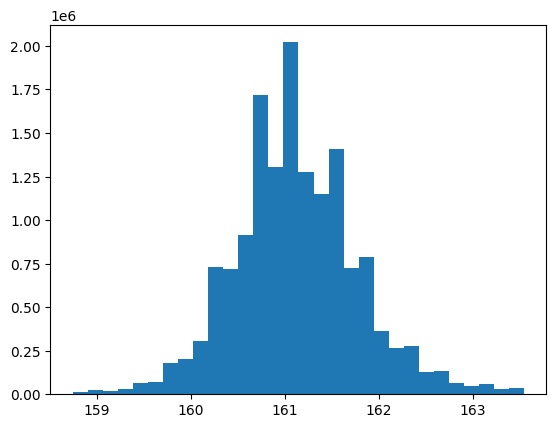

In [57]:
masterbias=bias()
mean=np.mean(masterbias)
std=np.std(masterbias)
plt.hist(masterbias.flatten(),range=(mean-3*std,mean+3*std), bins=30);

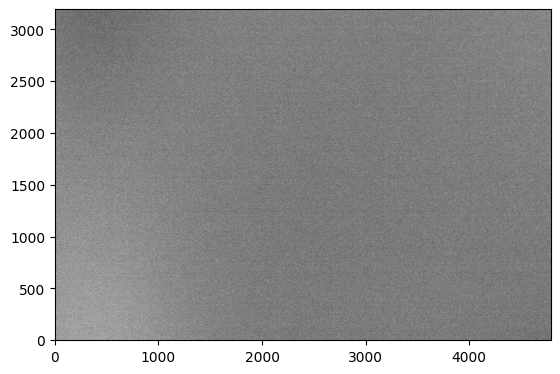

In [56]:
plt.imshow(masterbias, cmap='gray', vmin=mean-2*std, vmax=mean+2*std, origin='lower')

## MASTER FLAT

In [93]:
pathf=os.getcwd()+'/FLATG'
fitsfilef=fits.open(pathf+'/'+'09-24-10_G_FlatWizard_1.00s_0000.fits')
#fitsfile.info() 

dataf = fitsfilef[0].data
dataf

array([[17329, 17426, 17262, ..., 17592, 17523, 17341],
       [17212, 17170, 17246, ..., 17498, 17637, 17504],
       [17335, 17201, 17243, ..., 17488, 17811, 17337],
       ...,
       [16188, 16132, 16116, ..., 16828, 16787, 16506],
       [16144, 16330, 15975, ..., 16540, 16360, 16420],
       [16134, 16304, 16074, ..., 16625, 16540, 16559]], dtype=uint16)

In [119]:
def flat(filter):
    path=os.getcwd()+'/FLAT'+filter
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros((dataf.shape[0],dataf.shape[1],Num_of_files))
    j=0
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid[:,:,j]=dati
        j+=1
    master=np.median(Grid, axis=2)-masterbias
    return master

In [127]:
masterflat=flat('G')
masterflat/np.median(masterflat)       #rinormlization 

array([[0.60931542, 0.61087053, 0.60661358, ..., 0.6178578 , 0.61783169,
        0.61333495],
       [0.60794788, 0.60658984, 0.60714778, ..., 0.62207439, 0.61896893,
        0.61628608],
       [0.60903052, 0.61262744, 0.60564016, ..., 0.62207914, 0.61739246,
        0.6180335 ],
       ...,
       [0.56695015, 0.56898484, 0.57200957, ..., 0.58511042, 0.58490862,
        0.57772665],
       [0.56742974, 0.56758406, 0.56915578, ..., 0.58310422, 0.58129033,
        0.5812286 ],
       [0.56645631, 0.57079873, 0.56671273, ..., 0.58087485, 0.58172481,
        0.58079175]])

In [121]:
masterflat.shape

(3194, 4788)

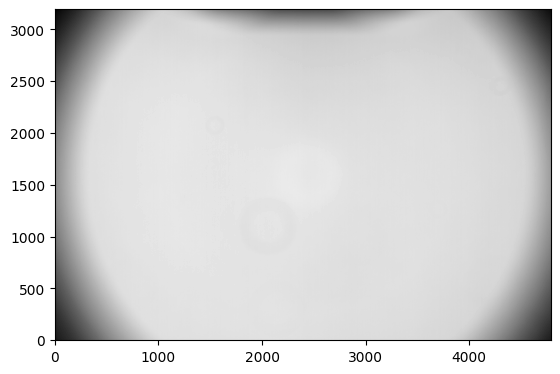

In [128]:
plt.imshow(masterflat, cmap='gray', origin='lower')

## DARK CURRENT 

In [131]:
pathd=os.getcwd()+'/DARK600'
fitsfiled=fits.open(pathd+'/'+'18-49-41__DARK_600.00s_0000.fits')

datad = fitsfiled[0].data

In [132]:
def dark(time):
    path=os.getcwd()+'/DARK'+time
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros((datad.shape[0],datad.shape[1],Num_of_files))
    j=0
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid[:,:,j]=dati
        j+=1
    master=np.median(Grid, axis=2)-masterbias
    return master

In [ ]:
mastercurrent=dark('600')
meanc=np.mean(mastercurrent)
stdc=np.std(mastercurrent)


In [139]:
stdc
meanc

5.634879356430459

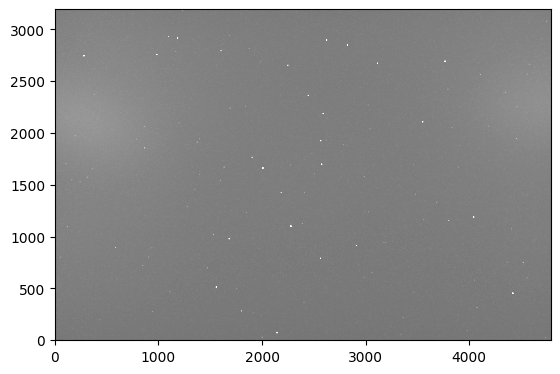

In [137]:
plt.imshow(mastercurrent, cmap='gray', vmin=meanc-2*stdc, vmax=meanc+2*stdc,origin='lower')